# Introdução

Este é o primeiro notebook do [Projeto Final do Bootcamp da Alura](https://github.com/renanmath/Bootcamp_Projeto_Final). [Clique aqui](https://github.com/renanmath/Bootcamp_Projeto_Final/tree/main/notebooks) para acessar os demais notebooks.

No fim de 2019/início de 2020 o mundo vivenciou o início de um dos perídos mais sombrios da história recente: a pandemia de Covid-19. Com uma taxa de aceleração cada vez mais acelerada, um número cada vez maior pacientes passou a necessitar internação hospitalar devido às complicações da doença. Uma fração desses pacientes infelizmente acaba evoluindo para casos mais graves, que requerem internação em uma UTI (Unidade de Terapia Intensiva). Obviamente, o número de leitos de UTI é limitado e era de se esperar que em algum momento não houvesse mais leitos para todos os pacientes. 
De fato, em várias localidades do Brasil, houve uma crise de leitos de UTI no primeiro semestre de 2020. Confiram essas notícias da época:

https://g1.globo.com/bemestar/coronavirus/noticia/2020/03/15/brasil-precisa-aumentar-em-20percent-o-total-de-leitos-de-uti-para-adultos-no-sus-para-tratar-coronavirus-diz-entidade-medica.ghtml

https://g1.globo.com/am/amazonas/noticia/2020/04/23/amazonas-atinge-96percent-de-ocupacao-em-leitos-de-uti-da-rede-publica-de-saude-diz-susam.ghtml

https://g1.globo.com/pe/pernambuco/noticia/2020/04/20/pernambuco-tem-99percent-dos-leitos-de-uti-dedicados-a-covid-19-ocupados-diz-secretario-de-saude.ghtml

https://g1.globo.com/ce/ceara/noticia/2020/04/16/ceara-ocupa-100percent-dos-leitos-de-uti-para-coronavirus-e-fila-de-espera-ja-chega-a-48-pacientes.ghtml

https://www.em.com.br/app/noticia/gerais/2020/06/25/interna_gerais,1159962/ocupacao-dos-leitos-de-uti-para-covid-19-bate-recorde-em-bh.shtml

https://www1.folha.uol.com.br/equilibrioesaude/2020/03/sus-nos-estados-nao-tem-leitos-de-uti-contra-o-coronavirus.shtml



Na época, o IBGE divulgou um levantamento da situação hospitalar no Brasil. O artigo a seguir trás alguns dados interessantes:

https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/27614-ibge-divulga-distribuicao-de-utis-respiradores-medicos-e-enfermeiros

Obviamente, nem todos os pacientes que chegam em um hospital para tratamento de covid-19 necessitarão ser internados em uma UTI. Mas aqueles que sim, não necessiamente precisisarão no momento em que derem entrada no hospital. Pode haver uma janela de tempo entre o momento de entrada e o momento de uma possível internação em UTI. Seria muito bom saber, por questões logísiticas, com horas de antecedência, se um paciente precisará ou não ser levado à UTI. Supondo que um hospital esteja com todas as suas UTI's ocupadas (e permanecerão ocupadas nas próximas horas) e que se sabe de antemão que um paciente necessitará de uma UTI nas próximas horas, pode-se providenciar uma transferência para outro hospital, por exemplo. 

Pensando nesse tipo de problemática, o [Hospital Sírio Libanês](https://siriolibanes.org.br/) lançou em 2020 um [desafio no Kaggle](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19). Foi fornecido um dataset com informações sobre pacientes (veja detalhes abaixo) e duas tarefas bem simples: a partir dos dados, implementar modelos de machine learning para prever



1.   se um paciente necessitará de UTI;
2.   se um paciente não necessitará de UTI.


Apesar de bem semelhantes, esses problemas são essencialmente distintos. Grosso modo, um modelo de ML que seja bom em prever se um paciente irá para a UTI não necessariamente é bom em prever se um paciente não precisará de UTI. Depende das métricas do modelo. Discutiremos isso em detalhes no próximo notebook, onde desenvolveremos os modelos. 

O objetivo desse projeto é basicamente tentar resolver esse desafio do Kaggle. Idealmente, tentamos desenvolver modelos que respondessem as duas questões acima. Os resultados, no entanto, mostraram que é muito mais fácil responder o problema 2 que o problema 1. Para um resumo detalhado dos resultados, consulte o arquivo readme. Para ver o estudo completo, veja o próximo notebook. 

Nesse notebook, nos concentraremos em fazer a análise exploratória dos dados fornecidos pelo Sírio Libanês. 

# Importação, interpretação e preparação dos dados


Primeiro, importaremos as bibliotecas necessárias:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import warnings
import math
import matplotlib.ticker as ticker


In [2]:
warnings.filterwarnings('ignore') #ignora os avisos
pd.options.display.float_format = "{:,.2f}".format #ajusta o formato numérico exibido
plt.style.use('seaborn-notebook')

Os dados originalmente se encontram no kernel do Kaggle disponibilizado pelo Sírio Libanês. O arquivo xlsx foi baixado e fizemos o upload para um repositório do Github. Assim, pode ser acessado de forma remota:

In [3]:
url = 'https://github.com/renanmath/Bootcamp_Projeto_Final/raw/main/Dados/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx'
dados = pd.read_excel(url)
dados

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.24,0.00,-0.16,-0.50,0.21,0.90,-0.25,-0.46,-0.43,-0.64,-0.42,0.74,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
1,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,0.33,-0.23,-0.13,-0.59,0.54,0.58,0.33,-0.23,-0.13,-0.59,0.54,0.58,0.44,0.00,-0.03,-0.50,0.71,0.84,-0.08,-0.46,-0.31,-0.64,0.25,0.58,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,2-4,0
2,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-0.99,-1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4-6,0
3,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,-0.11,0.74,nan,nan,nan,nan,-0.11,0.74,nan,nan,nan,nan,0.32,0.90,nan,nan,nan,nan,-0.28,0.74,nan,nan,nan,nan,-1.00,-1.00,nan,nan,nan,nan,-1.00,-1.00,6-12,0
4,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-1.00,-0.87,-0.87,-0.87,-0.87,-1.00,-0.86,-0.86,-0.86,-0.86,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.41,-0.41,-0.41,-0.41,-1.00,-0.98,-0.98,...,-1.00,-1.00,-0.24,-0.34,-0.21,-0.32,0.03,0.67,-0.28,-0.38,-0.19,-0.38,0.04,0.63,-0.34,-0.49,-0.57,-0.86,0.10,0.80,-0.08,0.29,0.30,0.27,0.36,0.95,-0.34,0.33,0.11,0.18,-0.24,-0.82,-0.39,0.41,-0.23,0.10,-0.24,-0.81,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,0.01,-0.29,0.06,-0.53,0.54,0.79,0.01,

Vejamos alguns comentários sobre os dados, baseados nas informações fornecidas pelo próprio Sírio Libanês. 

- Os dados são anonimizados.
- Os dados numéricos foram normalizados utilizando o [Min Max Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- A coluna PACIENT_VISIT_IDENTIFIER contém um identificar único para cada paciente. 
- As colunas AGE_ABOVE65, AGE_PERCENTIL E GENDER contém informações demógráficas dos pacientes. 
- Em seguida temos nove colunas com informações sobre grupos de doenças právias em cada paciente. Para manter a anonimidade dos dados, não foram fornecidos mais detalhes sobre esses grupos de doenças. 
- Logo depois temos colunas com resultados de testes sanguínieos e sinais vitais. Para cada teste e sinal vital, temos colunas com suas médias, medianas, máximo, mínimo, diferença e diferença relativa, onde:
  - diff = max - min
  - diff_rel = diff/median

Para saber mais sobre dados anonimizados e a LGPD, confira esses dois artigos:

- [7 dúvidas mais comuns sobre anonimização de dados na LGPD](https://getprivacy.com.br/anonimizacao-de-dados-lgpd/)
- [LGPD: entenda sobre anonimização de dados](https://getprivacy.com.br/anonimizacao-de-dados-lgpd/)

As duas últimas colunas do dataset são muito importantes. 
Na coluna WINDOW temos a janela de tempo desde o momento que o paciente entrou no hospital (admissão) até o momento de coleta dos dados. Temos os seguintes possíveis valores para essa coluna:
- 0-2 -----> de zero a duas horas após a adimissão
- 2-4 -----> de duas a quatro horas após a adimissão
- 4-6 -----> de quatro a seis horas após a adimissão
- 6-12 ----> de seis a doze horas após a adimissão
- ABOVE12 --> mais de doze horas após a adimissão

Já a coluna ICU (sigla em inglês para 'intensive care unit', em tradução: 'unidade de terapia intensiva') contém dados binários:
- 0 ---> o paciente não foi internado na UTI naquela janela de tempo
- 1 ---> o paciente foi internado na UTI naquela janela de tempo

Nos modelos de ML essa variável será o nosso alvo de predição: queremos antever a entrada (ou não entrada) de uma paciente na UTI, o mais cedo possível. Mais detalhes sobre o problema serão dados no próximo notebook. 

Após esses comentários iniciais, vamos à nossa análise exploratória. Começamos por verificar os tipos das colunas:

In [4]:
dados.dtypes

PATIENT_VISIT_IDENTIFIER        int64
AGE_ABOVE65                     int64
AGE_PERCENTIL                  object
GENDER                          int64
DISEASE GROUPING 1            float64
                               ...   
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                         object
ICU                             int64
Length: 231, dtype: object

Vamos ser um pouco mais precisos:

In [5]:
a,b,c = (dados.dtypes == 'float64').sum(), (dados.dtypes == 'int64').sum(), (dados.dtypes == 'object').sum()

print(f'Temos um total de {dados.shape[1]} colunas no dataframe')
print(f'Temos um total de {a} colunas de tipo float, {b} colunas de tipo int e {c} colunas de tipo object')
print(f'Temos {dados.shape[1] - a - b -c} colunas de outros tipos')

Temos um total de 231 colunas no dataframe
Temos um total de 225 colunas de tipo float, 4 colunas de tipo int e 2 colunas de tipo object
Temos 0 colunas de outros tipos


Assim, temos apenas colunas de tipo int, float e string. Vejamos quais são essas colunas:

In [6]:
dados.select_dtypes('object').columns

Index(['AGE_PERCENTIL', 'WINDOW'], dtype='object')

In [7]:
dados.select_dtypes('int64').columns

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'GENDER', 'ICU'], dtype='object')

In [8]:
dados.select_dtypes('float64').columns

Index(['DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN',
       'IMMUNOCOMPROMISED', 'OTHER', 'ALBUMIN_MEDIAN',
       ...
       'HEART_RATE_DIFF', 'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF',
       'OXYGEN_SATURATION_DIFF', 'BLOODPRESSURE_DIASTOLIC_DIFF_REL',
       'BLOODPRESSURE_SISTOLIC_DIFF_REL', 'HEART_RATE_DIFF_REL',
       'RESPIRATORY_RATE_DIFF_REL', 'TEMPERATURE_DIFF_REL',
       'OXYGEN_SATURATION_DIFF_REL'],
      dtype='object', length=225)

Notamos que as colunas de tipo int contém variáveis categóricas, dentre elas a nossa variável alvo, ICU. As duas variáveis do tipo string também são categóricas. 

Porém, as variávies 'DISEASE GROUPING 1' a 'DISEASE GROUPING 6' também são categóricas, mas estão como tipo float. Queremos transformá-las em tipo int.

Vamos colecinar as variáveis que são referentes a doenças em uma lista:

In [9]:
disease_colunas = [x for x in dados.columns if x.find('DISEASE') != -1] + ['HTN', 'IMMUNOCOMPROMISED']
disease_colunas


['DISEASE GROUPING 1',
 'DISEASE GROUPING 2',
 'DISEASE GROUPING 3',
 'DISEASE GROUPING 4',
 'DISEASE GROUPING 5',
 'DISEASE GROUPING 6',
 'HTN',
 'IMMUNOCOMPROMISED']

Um ponto a se observar é a variável 'PATIENT_VISIT_IDENTIFIER'. Notamos que ela apresenta valores repetidos. Isso porque cada linha na verdade não é um paciente, mas uma visita do paciente em uma janela de tempo (descrita na variável 'WINDOW') . Não temos, portanto, 1925 pacientes. Vejamos os valores únicos:

In [10]:
p = len(dados['PATIENT_VISIT_IDENTIFIER'].unique())
print(f'Temos um total de {p} pacientes')

Temos um total de 385 pacientes


Usando um value_counts podemos saber quantas vezes cada paciente aparece:

In [11]:
dados['PATIENT_VISIT_IDENTIFIER'].value_counts()

384    5
191    5
121    5
122    5
123    5
      ..
258    5
259    5
260    5
261    5
0      5
Name: PATIENT_VISIT_IDENTIFIER, Length: 385, dtype: int64

Ao que parece, cada paciente é contado 5 vezes. Mas para termos certeza de que não estamos deixando passar nada, usaremos o comando set()

In [12]:
set(dados['PATIENT_VISIT_IDENTIFIER'].value_counts())

{5}

Portanto, realmente cada paciente aparece em exatamente 5 janelas distintas. 

Quanto às variáveis categóricas do tipo string, precisamos transformá-las em tipo int, pois muitos modelos de ML não lidam bem com dados não-numéricos. 
A coluna WINDOW não precisará ser tratada, pois, como veremos no momento de organizar os dados para os modelos, só consideraremos uma janela de tempo. Mas a coluna 'AGE_PERCENTIL' será transformada em variável numérica. Decidi transformar em float em vez de int, pois utilizarei essa coluna nos modelos de ML. Para isso utilizaremos um dicionário:

In [13]:
dict_age = {
    '10th': 0.1,
    '20th': 0.2,
    '30th': 0.3,
    '40th': 0.4,
    '50th': 0.5,
    '60th': 0.6,
    '70th': 0.7,
    '80th': 0.8,
    '90th': 0.9,
    'Above 90th': 1.0
}

dados['AGE_PERCENTIL'] = dados['AGE_PERCENTIL'].map(dict_age)

## Dados nulos

Nessa subsessão iremos analisar e tratar os dados nulos. 

In [14]:
print(f' Temos um total de {dados.isnull().sum().sum()} dados nulos no dataframe inteiro')

 Temos um total de 223863 dados nulos no dataframe inteiro


Vejamos esses dados por colunas:

In [15]:
dados.isnull().sum()

PATIENT_VISIT_IDENTIFIER        0
AGE_ABOVE65                     0
AGE_PERCENTIL                   0
GENDER                          0
DISEASE GROUPING 1              5
                             ... 
RESPIRATORY_RATE_DIFF_REL     748
TEMPERATURE_DIFF_REL          694
OXYGEN_SATURATION_DIFF_REL    686
WINDOW                          0
ICU                             0
Length: 231, dtype: int64

In [16]:
a,b = (dados.isnull().sum() == 0).sum(), (dados.isnull().sum() > 0).sum()
print(f'Temos um total de {a} colunas sem dados nulos e {b} colunas com dados nulos')

Temos um total de 6 colunas sem dados nulos e 225 colunas com dados nulos


Vejamos as colunas sem nenhum dado nulo:

In [17]:
dados.columns[~dados.isnull().any()]

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'WINDOW', 'ICU'],
      dtype='object')

In [18]:
colunas_sem_nulos = dados.columns[~dados.isnull().any()]
colunas_sem_nulos

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'WINDOW', 'ICU'],
      dtype='object')

Curioso notar então que praticamente todas as colunas do nosso dataframe apresentam dados nulos. Deveremos tratar esses dados, já que pretendemos usar a maioria dessas colunas em nossos modelos de ML.

Já sabemos que cada um dos 385 pacientes aparece em 5 janelas de tempo, e em cada uma dessas janelas há dados dos testes de sangue e sinais vitais, bem como informações de doenças préviamente existentes. Uma pergunta que surge é:

**Existe algum paciente que apresenta dados nulos em todas as cinco janelas de tempo, para pelo menos uma variável?**

Essa pergunta é importante pois pretendemos preencher os dados nulos usando um fillna, para cada paciente: os dados não-nulos de alguma janela de tempo serão propagados para frente e para trás. Se existe alguma paciente onde há dados nulos em todas as janelas de tempo, esse método não irá funcionar.

O código abaixo responde esse problema:

In [19]:
lista_ind_ruins = []
for pac in dados['PATIENT_VISIT_IDENTIFIER'].unique().tolist():
  df_temp = dados.query('PATIENT_VISIT_IDENTIFIER == @pac')
  for col in df_temp.columns.tolist():
    if df_temp[col].isnull().sum() == 5:
      lista_ind_ruins.append(pac)
      break
lista_ind_ruins
  

[199, 287]

Nosso código retornou apenas dois índices. Vejamos os dados desses pacientes com esses códigos:

In [20]:
dados.query('PATIENT_VISIT_IDENTIFIER in @lista_ind_ruins')

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
995,199,0,0.10,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0-2,0
996,199,0,0.10,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2-4,0
997,199,0,0.10,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4-6,0
998,199,0,0.10,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6-12,0
999,199,0,0.10,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,ABOVE_12,0
1435,287,0,0.10,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,-0.11,-0.63,0.51,-0.25,0.11,0.84,-0.11,-0.63,0.51,-0.24,0.11,0.84,0.07,-0.33,0.56,-0.14,0.45,0.94,-0.38,-0.74,0.19,-0.33,-0.10,0.84,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
1436,287,0,0.10,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,-0.48,-0.65,0.04,-0.46,-0.16,0.84,-0.48,-0.65,0.04,-0.45,-0.16,0.84,-0.28,-0.34,0.09,-0.43,0.27,0.94,-0.61,-0.75,-0.15,-0.45,-0.30,0.84,-0.93,-1.00,-0.94,-0.88,-0.98,-1.00,-0.93,-1.00,-0.96,-0.88,-0.98,-1.00,2-4,0
1437,287,0,0.10,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,nan,nan,nan,nan,nan,nan,na

Já vemos de cara que o paciente 199 não apresenta informações sobre as doenças prévias. Se olharmos as outras colunas da tabela, vemos que ambos os pacientes 199 e 287 não possuem dados da maioria dos exames de sangue.

Nesse momento, é preciso decidir o que fazer com esses dados. O total de pacientes é 385, que na prática não é uma amostra tão grande assim, mas creio que podemos nos dar ao luxo de desconsiderar esses dois pacientes da nossa análise. Caso houvesse uma quantidade significativamente maior de pacientes nessa situação, outra solução deveria ser pensada. Se fosse esse o caso, provavelmente preencheríamos os dados nulos com a mediana dos dados. 

Mas a questão é ainda mais delicada que isso. Pretendemos elimiar os dados nulos usando um fillna, preenchendo usando os métodos bfill e ffill. Se apenas usarmos esse método, para esses pacientes que possuem colunas com todos os dados nulos em todas as janelas de tempo, isso não irá funcionar, pois vamos acabar preenchendo com dados de outro paciente. O mesmo vai ocorrer se o dado nulo estiver na primeira janela de tempo: ele será preencheido com último dado não nulo do paciente anterior. Mesmo usando o groupby pelo 'PATIENT_VISIT_IDENTIFIER' (como foi feito nas aulas), aconteceu o descrito acima (verificamos esse cenário). Pior ainda, não são poucas as linhas nessa situação: 

In [21]:
colunas_continuas = dados.iloc[:,13:-2].columns.tolist()

In [22]:
dados.query('WINDOW == "2-4"')[colunas_continuas].isnull().sum().sort_values()

ALBUMIN_MEDIAN               208
PH_ARTERIAL_MAX              208
PH_ARTERIAL_DIFF             208
PH_VENOUS_MEDIAN             208
PH_VENOUS_MEAN               208
                            ... 
RESPIRATORY_RATE_MIN         231
RESPIRATORY_RATE_DIFF        231
RESPIRATORY_RATE_MEAN        231
RESPIRATORY_RATE_DIFF_REL    231
RESPIRATORY_RATE_MAX         231
Length: 216, dtype: int64

Vemos então que no mínimo 208 pacientes apresetam algum dado nulo na primeira janela de tempo. 

In [23]:
dados.query('WINDOW == "ABOVE_12"')[colunas_continuas].isnull().sum().sort_values()

OXYGEN_SATURATION_DIFF_REL      1
HEART_RATE_MIN                  1
BLOODPRESSURE_SISTOLIC_MIN      1
BLOODPRESSURE_DIASTOLIC_MIN     1
OXYGEN_SATURATION_MEDIAN        1
                               ..
LACTATE_MEDIAN                 11
LACTATE_MEAN                   11
LACTATE_MIN                    11
LACTATE_DIFF                   11
PC02_ARTERIAL_MIN              11
Length: 216, dtype: int64

Uma quantidade menos significativa apresenta dados nulos na última janela.
Mas, como vimos acima, apenas os pacientes 199 e 287 apresentam colunas com dados nulos em todas as janelas. Então com excessão desses dois, podemos remediar a situação.O que faremos é o seguinte:
- Dropar os pacientes 199 e 287
- Preencher os dados usando dataframes auxiliares, cada um contendo informações de apenas um paciente. 

In [24]:
ind_excluir = dados.query('PATIENT_VISIT_IDENTIFIER in @lista_ind_ruins').index.tolist()
dados.drop(ind_excluir, inplace=True)
dados

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,0.60,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.24,0.00,-0.16,-0.50,0.21,0.90,-0.25,-0.46,-0.43,-0.64,-0.42,0.74,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
1,0,1,0.60,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,0.33,-0.23,-0.13,-0.59,0.54,0.58,0.33,-0.23,-0.13,-0.59,0.54,0.58,0.44,0.00,-0.03,-0.50,0.71,0.84,-0.08,-0.46,-0.31,-0.64,0.25,0.58,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,2-4,0
2,0,1,0.60,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-0.99,-1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4-6,0
3,0,1,0.60,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,-0.11,0.74,nan,nan,nan,nan,-0.11,0.74,nan,nan,nan,nan,0.32,0.90,nan,nan,nan,nan,-0.28,0.74,nan,nan,nan,nan,-1.00,-1.00,nan,nan,nan,nan,-1.00,-1.00,6-12,0
4,0,1,0.60,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-1.00,-0.87,-0.87,-0.87,-0.87,-1.00,-0.86,-0.86,-0.86,-0.86,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.41,-0.41,-0.41,-0.41,-1.00,-0.98,-0.98,...,-1.00,-1.00,-0.24,-0.34,-0.21,-0.32,0.03,0.67,-0.28,-0.38,-0.19,-0.38,0.04,0.63,-0.34,-0.49,-0.57,-0.86,0.10,0.80,-0.08,0.29,0.30,0.27,0.36,0.95,-0.34,0.33,0.11,0.18,-0.24,-0.82,-0.39,0.41,-0.23,0.10,-0.24,-0.81,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,0.50,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,0.01,-0.29,0.06,-0.53,0.54,0.79,0.01,

Muito bem, agora que eliminamos os índices problemáticos do nosso dataframe, podemos preencher os dados nulos, mas lembrando de nos restringir a cada paciente de cada vez. Lidaremos primeiro apenas com os dados das colunas contínuas:

In [25]:
dados_continuos_sem_nulos = pd.DataFrame()
for pac in dados['PATIENT_VISIT_IDENTIFIER'].unique().tolist():
  df_temp = dados.query('PATIENT_VISIT_IDENTIFIER == @pac')[colunas_continuas].fillna(method = 'backfill').fillna(method = 'ffill')
  dados_continuos_sem_nulos = pd.concat([dados_continuos_sem_nulos, df_temp])
dados_continuos_sem_nulos

,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,...,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL
0,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,-0.94,-0.94,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.18,0.18,0.18,0.18,-1.00,...,-0.99,-0.99,-0.99,-1.00,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.24,0.00,-0.16,-0.50,0.21,0.90,-0.25,-0.46,-0.43,-0.64,-0.42,0.74,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
1,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,-0.94,-0.94,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.18,0.18,0.18,0.18,-1.00,...,-0.99,-0.99,-0.99,-1.00,0.33,-0.23,-0.13,-0.59,0.54,0.58,0.33,-0.23,-0.13,-0.59,0.54,0.58,0.44,0.00,-0.03,-0.50,0.71,0.84,-0.08,-0.46,-0.31,-0.64,0.25,0.58,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
2,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,-0.94,-0.94,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.18,0.18,0.18,0.18,-1.00,...,-0.99,-0.99,-0.99,-1.00,-0.24,-0.34,-0.21,-0.32,-0.11,0.74,-0.28,-0.38,-0.19,-0.38,-0.11,0.74,-0.34,-0.49,-0.57,-0.86,0.32,0.90,-0.08,0.29,0.30,0.27,-0.28,0.74,-0.34,0.33,0.11,0.18,-1.00,-1.00,-0.39,0.41,-0.23,0.10,-1.00,-1.00
3,0.00,0.00,0.00,0.00,-1.00,-0.87,-0.87,-0.87,-0.87,-1.00,-0.86,-0.86,-0.86,-0.86,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.41,-0.41,-0.41,-0.41,-1.00,-0.98,-0.98,-0.98,-0.98,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.33,0.33,0.33,0.33,-1.00,...,-1.00,-1.00,-1.00,-1.00,-0.24,-0.34,-0.21,-0.32,-0.11,0.74,-0.28,-0.38,-0.19,-0.38,-0.11,0.74,-0.34,-0.49,-0.57,-0.86,0.32,0.90,-0.08,0.29,0.30,0.27,-0.28,0.74,-0.34,0.33,0.11,0.18,-1.00,-1.00,-0.39,0.41,-0.23,0.10,-1.00,-1.00
4,0.00,0.00,0.00,0.00,-1.00,-0.87,-0.87,-0.87,-0.87,-1.00,-0.86,-0.86,-0.86,-0.86,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.41,-0.41,-0.41,-0.41,-1.00,-0.98,-0.98,-0.98,-0.98,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.33,0.33,0.33,0.33,-1.00,...,-1.00,-1.00,-1.00,-1.00,-0.24,-0.34,-0.21,-0.32,0.03,0.67,-0.28,-0.38,-0.19,-0.38,0.04,0.63,-0.34,-0.49,-0.57,-0.86,0.10,0.80,-0.08,0.29,0.30,0.27,0.36,0.95,-0.34,0.33,0.11,0.18,-0.24,-0.82,-0.39,0.41,-0.23,0.10,-0.24,-0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

Agora podemos concatenar esses dados com os dados categóricos e os dados de saída:

In [26]:
dados_categoricos = dados.iloc[:,0:13]
dados_categoricos

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER
0,0,1,0.60,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00
1,0,1,0.60,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00
2,0,1,0.60,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00
3,0,1,0.60,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00
4,0,1,0.60,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,0.50,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1921,384,0,0.50,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1922,384,0,0.50,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1923,384,0,0.50,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [27]:
dados_saida = dados.iloc[:,-2:]
dados_saida

,WINDOW,ICU
0,0-2,0
1,2-4,0
2,4-6,0
3,6-12,0
4,ABOVE_12,1
...,...,...
1920,0-2,0
1921,2-4,0
1922,4-6,0
1923,6-12,0


In [28]:
dados_sem_nulos = pd.concat([dados_categoricos,dados_continuos_sem_nulos,dados_saida], axis=1)
dados_sem_nulos.columns = dados.columns
dados_sem_nulos

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,0.60,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-0.99,-1.00,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.24,0.00,-0.16,-0.50,0.21,0.90,-0.25,-0.46,-0.43,-0.64,-0.42,0.74,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
1,0,1,0.60,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-0.99,-1.00,0.33,-0.23,-0.13,-0.59,0.54,0.58,0.33,-0.23,-0.13,-0.59,0.54,0.58,0.44,0.00,-0.03,-0.50,0.71,0.84,-0.08,-0.46,-0.31,-0.64,0.25,0.58,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,2-4,0
2,0,1,0.60,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-0.99,-1.00,-0.24,-0.34,-0.21,-0.32,-0.11,0.74,-0.28,-0.38,-0.19,-0.38,-0.11,0.74,-0.34,-0.49,-0.57,-0.86,0.32,0.90,-0.08,0.29,0.30,0.27,-0.28,0.74,-0.34,0.33,0.11,0.18,-1.00,-1.00,-0.39,0.41,-0.23,0.10,-1.00,-1.00,4-6,0
3,0,1,0.60,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-1.00,-0.87,-0.87,-0.87,-0.87,-1.00,-0.86,-0.86,-0.86,-0.86,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.41,-0.41,-0.41,-0.41,-1.00,-0.98,-0.98,...,-1.00,-1.00,-0.24,-0.34,-0.21,-0.32,-0.11,0.74,-0.28,-0.38,-0.19,-0.38,-0.11,0.74,-0.34,-0.49,-0.57,-0.86,0.32,0.90,-0.08,0.29,0.30,0.27,-0.28,0.74,-0.34,0.33,0.11,0.18,-1.00,-1.00,-0.39,0.41,-0.23,0.10,-1.00,-1.00,6-12,0
4,0,1,0.60,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-1.00,-0.87,-0.87,-0.87,-0.87,-1.00,-0.86,-0.86,-0.86,-0.86,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.41,-0.41,-0.41,-0.41,-1.00,-0.98,-0.98,...,-1.00,-1.00,-0.24,-0.34,-0.21,-0.32,0.03,0.67,-0.28,-0.38,-0.19,-0.38,0.04,0.63,-0.34,-0.49,-0.57,-0.86,0.10,0.80,-0.08,0.29,0.30,0.27,0.36,0.95,-0.34,0.33,0.11,0.18,-0.24,-0.82,-0.39,0.41,-0.23,0.10,-0.24,-0.81,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Vamos verificar se o processo funcinou, contanto o total de nulos:

In [29]:
dados_sem_nulos.isnull().sum().sum()

0

Agora sim não temos mais dados nulos no nosso dataframe

## Dados agrupados

Vamos agora transforma esse dataframe em um dataframe com as informação por paciente. Agruparemos pela variável 'PATIENT_VISIT_IDENTIFIER' e usaremos o método max(). Isso provavelmente não fará muito sentindo para as variáveis tipo float, porém será útil para as variáveis categóricas. Não tem problema, pois nesse primeiro momento queremos apenas analisar as variáveis categóricas. Quando formos lidar com a análise exploratória  dos dados contínuos, faremos um tratamento diferente. 

Além disso, precisamos tomar outra decisão. Já sabemos, devido à natureza do problema, que eventualmente vamos excluir os pacientes que foram para a UTI na primeira janela de tempo, antes de rodar os modelos de machine learning. Se fizermos isso agora, esses dados não serão considerados na análise exploratória. Porém no momento, queremos considerá-los. Então vamos manter esses dados, por enquanto.

In [30]:
dados_por_paciente = dados_sem_nulos[colunas_sem_nulos.tolist()+disease_colunas].groupby(by = 'PATIENT_VISIT_IDENTIFIER').max().reset_index()
dados_por_paciente

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,WINDOW,ICU,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED
0,0,1,0.60,0,ABOVE_12,1,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
1,1,1,0.90,1,ABOVE_12,1,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00
2,2,0,0.10,0,ABOVE_12,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,3,0,0.40,1,ABOVE_12,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,4,0,0.10,0,ABOVE_12,0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,380,0,0.40,1,ABOVE_12,1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
379,381,1,1.00,0,ABOVE_12,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
380,382,0,0.50,0,ABOVE_12,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
381,383,0,0.40,1,ABOVE_12,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Agora podemos transformar as colunas com as informações de doenças em colunas tipo int:

In [31]:
dados_por_paciente.drop('WINDOW', axis = 1, inplace= True)

for x in disease_colunas:
  dados_por_paciente[x] = dados_por_paciente[x].astype(int)

# Analise exploratória

Após o tratamento inicial, estamos prontos para fazer uma análise exploratória dos nossos dados. Nas três primeiras subsessões faremos uma análise dos dados agrupando-os segundo nossas variáveis categóricas:
- Percentil da idade
- Sexo
- Doenças prévias

Logo em seguida analizaremos os dados dos testes sanguíneos e sinais vitais. 

## Percentil da idade

Vamos criar um novo dataframe, onde agruparemos os dados dos pacientes pelo percentil da da idade. Nesse data frame, incluiremos três novas colunas:
- 'Total' -----> número total de pacientes com idade naquele percentil
- 'ICU%' ------> porcentagem dos pacientes com aquele percentil de idade e que foram para a UTI, em relação ao total de pacientes.
- 'ICU%_rel' ----> porcentagem dos pacientes com aquele percentil de idade e que foram para a UTI, em relação ao total de pacientes com aquele percentil.

In [32]:
dados_por_percentil = dados_por_paciente.groupby(by = 'AGE_PERCENTIL').sum().drop(['PATIENT_VISIT_IDENTIFIER','AGE_ABOVE65', 'GENDER'] + disease_colunas, axis = 1).reset_index()
dados_por_percentil['Total'] = dados_por_paciente.groupby(by = 'AGE_PERCENTIL').count().iloc[:,1].tolist()
dados_por_percentil['ICU%'] = round(100*dados_por_percentil['ICU']/dados_por_paciente.shape[0], 2)
dados_por_percentil['ICU%_rel'] = round(100*dados_por_percentil['ICU']/dados_por_percentil['Total'],2)
dados_por_percentil

,AGE_PERCENTIL,ICU,Total,ICU%,ICU%_rel
0,0.10,9,39,2.35,23.08
1,0.20,12,43,3.13,27.91
2,0.30,18,41,4.70,43.90
3,0.40,15,40,3.92,37.50
4,0.50,20,38,5.22,52.63
5,0.60,20,37,5.22,54.05
6,0.70,22,39,5.74,56.41
7,0.80,26,38,6.79,68.42
8,0.90,23,31,6.01,74.19
9,1.00,29,37,7.57,78.38


Inicialmente, vamos plotar os gráficos dos valores absolutos, isto é, o número de pacientes na UTI, de acordo com o percentil da idade:

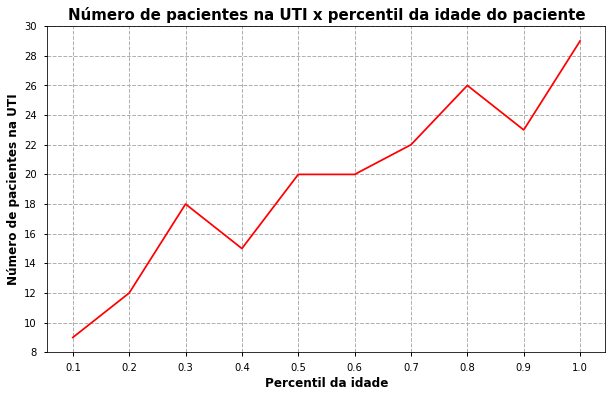

In [33]:
plt.figure(figsize = (10,6))
ax = sns.lineplot(data = dados_por_percentil, x = 'AGE_PERCENTIL', y = 'ICU', color = 'r')
plt.title('Número de pacientes na UTI x percentil da idade do paciente', fontdict = {'fontsize':15,'fontweight':'bold'})
plt.xlabel('Percentil da idade',fontdict = {'fontsize':12,'fontweight':'bold'})
plt.ylabel('Número de pacientes na UTI',fontdict = {'fontsize':12,'fontweight':'bold'})
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.grid(linestyle = '--')
plt.show()

Agora, vejamos o gráfico dos valores em percentuais do número de pacientes na UTI, relativo ao total de pacientes.

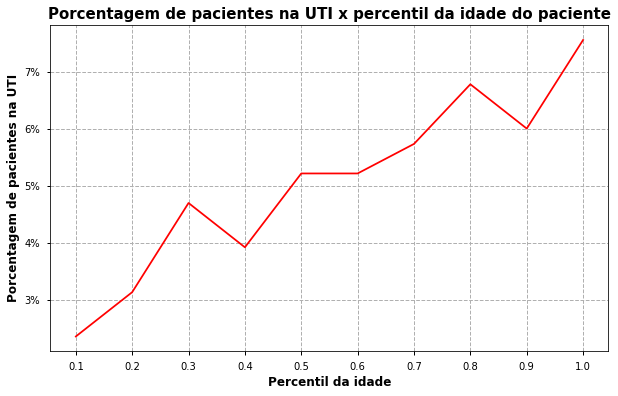

In [34]:
plt.figure(figsize = (10,6))
ax = sns.lineplot(data = dados_por_percentil, x = 'AGE_PERCENTIL', y = 'ICU%', color = 'r')
plt.title('Porcentagem de pacientes na UTI x percentil da idade do paciente', fontdict = {'fontsize':15,'fontweight':'bold'})
plt.xlabel('Percentil da idade',fontdict = {'fontsize':12,'fontweight':'bold'})
plt.ylabel('Porcentagem de pacientes na UTI',fontdict = {'fontsize':12,'fontweight':'bold'})
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d%%'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.grid(linestyle = '--')
plt.show()

Por fim, o gráfico das porcentagems relativas do número de pacientes na UTI:

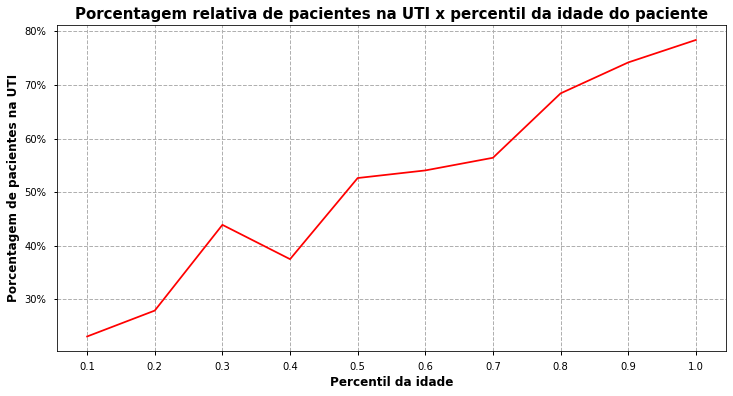

In [35]:
plt.figure(figsize = (12,6))
ax = sns.lineplot(data = dados_por_percentil, x = 'AGE_PERCENTIL', y = 'ICU%_rel', color = 'r')
plt.title('Porcentagem relativa de pacientes na UTI x percentil da idade do paciente', fontdict = {'fontsize':15,'fontweight':'bold'})
plt.xlabel('Percentil da idade',fontdict = {'fontsize':12,'fontweight':'bold'})
plt.ylabel('Porcentagem de pacientes na UTI',fontdict = {'fontsize':12,'fontweight':'bold'})
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d%%'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
plt.grid(linestyle = '--')
plt.show()

Concluímos então que o risco de ir para a UTI aumenta significativamenbte com a idade. Nos mais jovens, a procentagem de casos de UTI é abaixo de 30%, enquanto que nos mais velhos essa porcentagem sobe para mais de 70%. Possivelmente essa variável deverá ter grande impacto nos modelos de ML.

## Sexo

Façamos agora uma análse pelo sexo do paciente. As colunas do dataframe agrupado por GENDER seguem a mesma lógica do dataframe agrupado por AGE_PERCENTIL.

In [36]:
dados_por_sexo = dados_por_paciente.groupby(by = 'GENDER').sum().drop(['PATIENT_VISIT_IDENTIFIER','AGE_ABOVE65'] + disease_colunas, axis = 1).reset_index()
dados_por_sexo['Total'] = dados_por_paciente.groupby(by = 'GENDER').count().iloc[:,1].tolist()
dados_por_sexo['Total%'] = round(100*dados_por_sexo['Total']/(dados_por_sexo['Total'].sum()),2)
dados_por_sexo['ICU%'] = round(100*dados_por_sexo['ICU']/dados_por_paciente.shape[0], 2)
dados_por_sexo['ICU%_rel'] = round(100*dados_por_sexo['ICU']/dados_por_sexo['Total'],2)
dados_por_sexo

,GENDER,AGE_PERCENTIL,ICU,Total,Total%,ICU%,ICU%_rel
0,0,125.10,134,241,62.92,34.99,55.60
1,1,79.50,60,142,37.08,15.67,42.25


Pontos importante a se observar:
- O gênero 0 (masculino, segundo a equipe do Sírio Libanês) aparece com mais frequencia nos dados, constituindo mais de 60% da amostra. 
- Olhando os dados relativos, percebe-se ainda um desequilibrio nos dados, mas menor. 

Vamos juntar a análse por AGE_PERCENTIL, separando por gênero:

In [37]:
dados_por_percentil_0 = dados_por_paciente.query('GENDER == 0').groupby(by = 'AGE_PERCENTIL').sum().drop(['PATIENT_VISIT_IDENTIFIER','AGE_ABOVE65', 'GENDER'] + disease_colunas, axis = 1).reset_index()
dados_por_percentil_0['Total'] = dados_por_paciente.query('GENDER == 0').groupby(by = 'AGE_PERCENTIL').count().iloc[:,1].tolist()
dados_por_percentil_0['ICU%'] = round(100*dados_por_percentil_0['ICU']/dados_por_paciente.query('GENDER == 0').shape[0], 2)
dados_por_percentil_0['ICU%_rel'] = round(100*dados_por_percentil_0['ICU']/dados_por_percentil_0['Total'],2)
dados_por_percentil_0

,AGE_PERCENTIL,ICU,Total,ICU%,ICU%_rel
0,0.10,7,28,2.90,25.00
1,0.20,9,25,3.73,36.00
2,0.30,14,28,5.81,50.00
3,0.40,12,26,4.98,46.15
4,0.50,16,24,6.64,66.67
5,0.60,14,22,5.81,63.64
6,0.70,16,25,6.64,64.00
7,0.80,19,27,7.88,70.37
8,0.90,13,18,5.39,72.22
9,1.00,14,18,5.81,77.78


In [38]:
dados_por_percentil_1 = dados_por_paciente.query('GENDER == 1').groupby(by = 'AGE_PERCENTIL').sum().drop(['PATIENT_VISIT_IDENTIFIER','AGE_ABOVE65', 'GENDER'] + disease_colunas, axis = 1).reset_index()
dados_por_percentil_1['Total'] = dados_por_paciente.query('GENDER ==1').groupby(by = 'AGE_PERCENTIL').count().iloc[:,1].tolist()
dados_por_percentil_1['ICU%'] = round(100*dados_por_percentil_1['ICU']/dados_por_paciente.query('GENDER == 1').shape[0], 2)
dados_por_percentil_1['ICU%_rel'] = round(100*dados_por_percentil_1['ICU']/dados_por_percentil_1['Total'],2)
dados_por_percentil_1

,AGE_PERCENTIL,ICU,Total,ICU%,ICU%_rel
0,0.10,2,11,1.41,18.18
1,0.20,3,18,2.11,16.67
2,0.30,4,13,2.82,30.77
3,0.40,3,14,2.11,21.43
4,0.50,4,14,2.82,28.57
5,0.60,6,15,4.23,40.00
6,0.70,6,14,4.23,42.86
7,0.80,7,11,4.93,63.64
8,0.90,10,13,7.04,76.92
9,1.00,15,19,10.56,78.95


Agora, os gráficos:

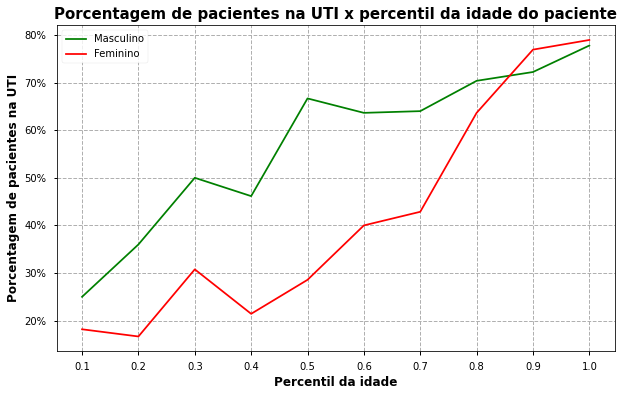

In [39]:
plt.figure(figsize = (10,6))
ax = sns.lineplot(data = dados_por_percentil_0, x = 'AGE_PERCENTIL', y = 'ICU%_rel', color = 'g')
sns.lineplot(data = dados_por_percentil_1, x = 'AGE_PERCENTIL', y = 'ICU%_rel', color = 'r')
plt.title('Porcentagem de pacientes na UTI x percentil da idade do paciente', fontdict = {'fontsize':15,'fontweight':'bold'})
plt.xlabel('Percentil da idade',fontdict = {'fontsize':12,'fontweight':'bold'})
plt.ylabel('Porcentagem de pacientes na UTI',fontdict = {'fontsize':12,'fontweight':'bold'})
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d%%'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
plt.grid(linestyle = '--')
plt.legend(['Masculino', 'Feminino'])
plt.show()

Percebemos então que o gênero masculino apresenta uma maior taxa de internações na UTI, na maioria das faixas de idade. Apenas nas últimas faixas etárias o gênero feminino tem uma alta acentuada nas taxas de internação, praticamente se igualando às taxas do gênero masculino. 

## Grupos de doenças

Façamos agora uma análise agrupando pelos grupos de doenças prévias. Para isso, criaremos um dataframe com as seguintes informações:
- Nas colunas teremos os grupos de doenças
- Nas linhas teremos as possibilidades do paciente ter uma doença do grupo: 0 ou 1.
- Assim, na linha 0 teremos as porcentagens de paciente que foram para UTI, e não possuem a doença. Na linha 1 teremos as porcentagens de paciente que foram para UTI, e não possuem a doença. 

In [40]:
icu_diseases = pd.DataFrame()
for doenca in disease_colunas:
  a = dados_por_paciente[doenca].value_counts().tolist()
  b = dados_por_paciente.query('ICU == 1')[doenca].value_counts().tolist()
  icu_diseases[doenca] = [100*(b[0] / a[0]), 100*(b[1] / a[1])]

icu_diseases

,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED
0,49.85,49.04,46.79,49.87,47.20,50.14,42.48,48.73
1,55.36,83.33,73.21,80.00,68.85,56.67,69.23,59.70


Vemos assim que se o paciente tem alguma doença do grupo 2,3, 4, 5 ou HTN há uma probabilidade mais alta dele ir para a UTI.

Vejamos essas informações sumarizadas em um gráfico:

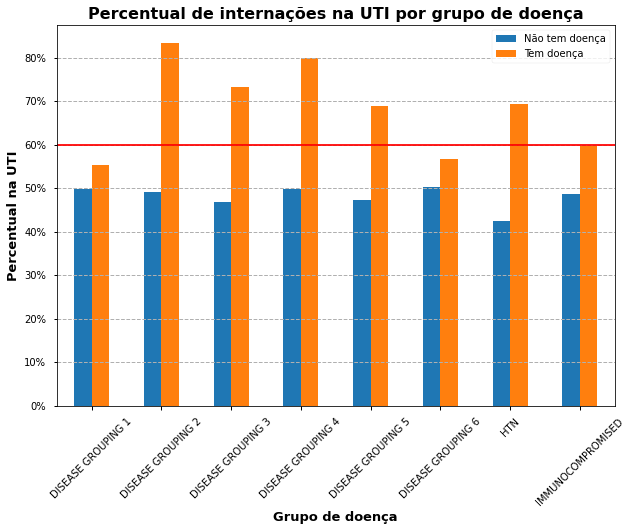

In [41]:
ax = icu_diseases.T.plot(kind = 'bar', figsize = (10,7))
plt.title('Percentual de internações na UTI por grupo de doença', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.grid(axis = 'y', linestyle = '--', linewidth = 1)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d%%'))
plt.legend(['Não tem doença', 'Tem doença'])
plt.ylabel('Percentual na UTI', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Grupo de doença', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xticks(rotation = 45)
plt.axhline(y=60, color='r', linestyle='-')
plt.show()

Varemos agora a mesma análise, mas separando por gênero:

In [42]:
icu_diseases_m = pd.DataFrame()
for doenca in disease_colunas:
  a = dados_por_paciente.query('GENDER == 0')[doenca].value_counts().tolist()
  b = dados_por_paciente.query('GENDER == 0').query('ICU == 1')[doenca].value_counts().tolist()
  icu_diseases_m[doenca] = [100*(b[0] / a[0]), 100*(b[1] / a[1])]

icu_diseases_m

,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED
0,54.07,53.10,50.51,54.70,53.20,55.20,48.17,52.26
1,65.62,93.33,79.07,85.71,68.42,60.00,71.43,71.43


In [43]:
icu_diseases_f = pd.DataFrame()
for doenca in disease_colunas:
  a = dados_por_paciente.query('GENDER == 1')[doenca].value_counts().tolist()
  b = dados_por_paciente.query('GENDER == 1').query('ICU == 1')[doenca].value_counts().tolist()
  icu_diseases_f[doenca] = [100*(b[0] / a[0]), 100*(b[1] / a[1])]

icu_diseases_f

,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED
0,42.37,42.45,41.09,41.73,36.97,41.67,33.33,42.74
1,41.67,33.33,53.85,66.67,69.57,50.00,65.00,40.00


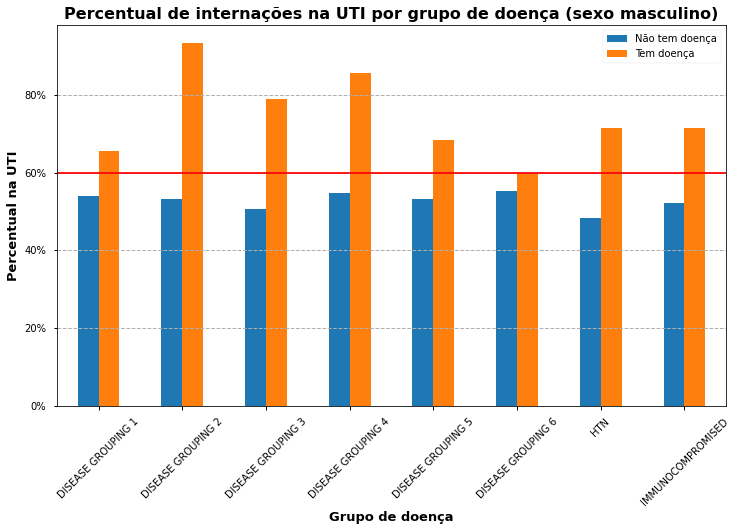

In [44]:
ax = icu_diseases_m.T.plot(kind = 'bar', figsize = (12,7))
plt.title('Percentual de internações na UTI por grupo de doença (sexo masculino)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.grid(axis = 'y', linestyle = '--', linewidth = 1)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d%%'))
plt.legend(['Não tem doença', 'Tem doença'])
plt.ylabel('Percentual na UTI', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Grupo de doença', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xticks(rotation = 45)
plt.axhline(y=60, color='r', linestyle='-')
plt.show()

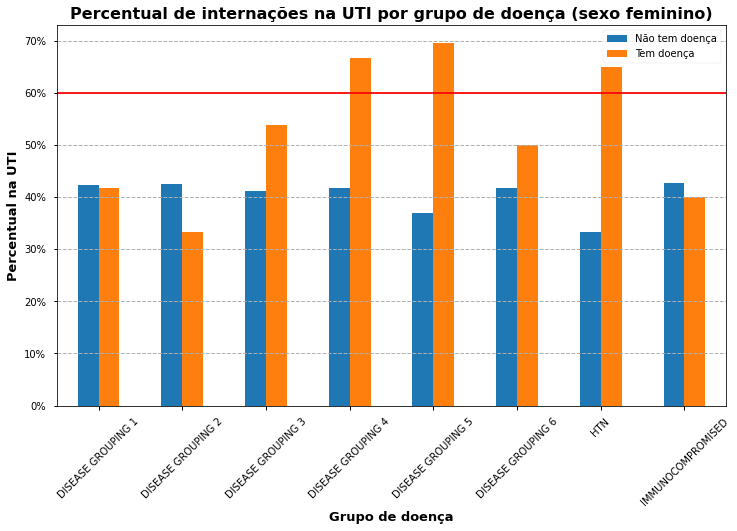

In [45]:
ax = icu_diseases_f.T.plot(kind = 'bar', figsize = (12,7))
plt.title('Percentual de internações na UTI por grupo de doença (sexo feminino)', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.grid(axis = 'y', linestyle = '--', linewidth = 1)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d%%'))
plt.legend(['Não tem doença', 'Tem doença'])
plt.ylabel('Percentual na UTI', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xlabel('Grupo de doença', fontdict={'fontsize': 13, 'fontweight':'bold'})
plt.xticks(rotation = 45)
plt.axhline(y=60, color='r', linestyle='-')
plt.show()

## Medidas contínuas: testes sanguíneos e sinais vitais

### Dados agrupados

Passemos agora a analisa das variáveis contínuas. 
A ideia principal é identificar aquelas que possuem maior disparidade entre as distribuições para ICU == 1 e ICU == 0. Faremos isso medindo a diferença entre os percentis dos dados e tomando a soma dos erros absolutos. 



Antes disso, porém, precisaremos que os dados estejam agrupados por paciente e nesse momento precisamos decidir como fazer isso levando em conta os dados contínuos. Considerando que queremos prever com a maior antecedência possível se um paciente vai ou não para a UTI, o que faremos é pegar, para cada paciente, os dados da sua primeira janela de tempo. Mas devemos tomar um cuidado: queremos manter a informação se aquele paciente foi ou não para a UTI (em qualquer janela de tempo). De modo que inevitavelmente teremos que passar por todas as janelas, olhando para a variável ICU. Se em alguma janela tivermos ICU == 1, então marcamos 1 no dataframe agrupado, caso contrário marcamos 0. Vamos excuir também aqueles pacientes que deram entrada na UTI na primeira janela, pois esses serão irrelevantes para os modelos preditivos. 
O código é o seguinte:

In [46]:
dados_resumidos = pd.DataFrame(columns = dados.columns)
for idn in dados['PATIENT_VISIT_IDENTIFIER'].unique().tolist():
    df_temp = dados_sem_nulos.query('PATIENT_VISIT_IDENTIFIER == @idn')
    if df_temp.iloc[0]['ICU'] == 1:
        pass
    else:
        cont = 0
        for i in range(1,5):
            if df_temp.iloc[i]['ICU'] == 1:
                lista = df_temp.iloc[0].tolist()[:-1]
                lista.append(1)
                dados_resumidos.loc[idn] = lista
                break
            else:
                cont = i
                
            if cont == 4:
                dados_resumidos.loc[idn] = df_temp.iloc[0]

dados_resumidos

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,0.60,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-0.99,-1.00,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.24,0.00,-0.16,-0.50,0.21,0.90,-0.25,-0.46,-0.43,-0.64,-0.42,0.74,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
2,2,0,0.10,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-0.98,-1.00,-0.49,-0.69,-0.05,-0.65,0.36,0.94,-0.51,-0.82,-0.06,-0.52,0.36,0.95,-0.53,-0.51,-0.11,-0.71,0.60,0.96,-0.44,-0.49,0.00,-0.58,0.10,1.00,-0.55,-0.53,-0.60,-0.76,-1.00,-0.96,-0.52,-0.35,-0.75,-0.76,-1.00,-0.96,0-2,1
3,3,0,0.40,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,-0.26,-0.26,-0.26,-0.26,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.97,-0.97,...,-0.98,-1.00,0.01,-0.37,-0.53,-0.46,-0.29,0.68,0.01,-0.37,-0.53,-0.45,-0.29,0.68,0.18,-0.11,-0.38,-0.36,0.21,0.88,-0.30,-0.56,-0.63,-0.52,-0.42,0.68,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
4,4,0,0.10,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-1.00,-1.00,0.33,-0.15,0.16,-0.59,0.29,0.87,0.33,-0.15,0.16,-0.59,0.29,0.87,0.44,0.00,0.20,-0.57,0.54,0.94,-0.08,-0.35,-0.04,-0.58,0.07,0.89,-1.00,-0.88,-0.92,-0.88,-0.95,-0.98,-1.00,-0.88,-0.96,-0.87,-0.95,-0.98,0-2,0
5,5,0,0.10,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-1.00,-1.00,-0.04,-0.54,-0.54,-0.53,-0.20,0.82,-0.04,-0.54,-0.54,-0.52,-0.20,0.82,0.03,-0.38,-0.40,-0.43,0.25,0.92,-0.25,-0.57,-0.63,-0.58,-0.33,0.84,-0.83,-0.75,-0.98,-1.00,-0.98,-0.98,-0.86,-0.71,-0.99,-1.00,-0.98,-0.98,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

Importante observar a queda no número de pacientes (de 385 para 351) agora que excluímos aqueles que entraram na UTI na primeira janela. 

### Análise

Começaremos nossa análise verificando se existem dados contínuos que são iguais para todos os pacientes. Essas variáveis serão totalmente irrelevantes nos modelos de ML. Nesse primeiro momento não utilizaremos o dataframe dados_resumidos que acabamos de criar,  e sim o dataframe dados_sem_nulos:

In [47]:
colunas_com_unico_dado = []
for x in dados_sem_nulos.columns.tolist():
  if len(set(dados_sem_nulos[x].tolist())) == 1:
    colunas_com_unico_dado.append(x)
print(f'Temos {len(colunas_com_unico_dado)} colunas com único valor, a saber: \n')
colunas_com_unico_dado

Temos 36 colunas com único valor, a saber: 



['ALBUMIN_DIFF',
 'BE_ARTERIAL_DIFF',
 'BE_VENOUS_DIFF',
 'BIC_ARTERIAL_DIFF',
 'BIC_VENOUS_DIFF',
 'BILLIRUBIN_DIFF',
 'BLAST_DIFF',
 'CALCIUM_DIFF',
 'CREATININ_DIFF',
 'FFA_DIFF',
 'GGT_DIFF',
 'GLUCOSE_DIFF',
 'HEMATOCRITE_DIFF',
 'HEMOGLOBIN_DIFF',
 'INR_DIFF',
 'LACTATE_DIFF',
 'LEUKOCYTES_DIFF',
 'LINFOCITOS_DIFF',
 'NEUTROPHILES_DIFF',
 'P02_ARTERIAL_DIFF',
 'P02_VENOUS_DIFF',
 'PC02_ARTERIAL_DIFF',
 'PC02_VENOUS_DIFF',
 'PCR_DIFF',
 'PH_ARTERIAL_DIFF',
 'PH_VENOUS_DIFF',
 'PLATELETS_DIFF',
 'POTASSIUM_DIFF',
 'SAT02_ARTERIAL_DIFF',
 'SAT02_VENOUS_DIFF',
 'SODIUM_DIFF',
 'TGO_DIFF',
 'TGP_DIFF',
 'TTPA_DIFF',
 'UREA_DIFF',
 'DIMER_DIFF']

Elas poderão ser excluídas da base:

In [48]:
dados_resumidos.drop(colunas_com_unico_dado, axis=1, inplace= True)
dados_resumidos

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,...,DIMER_MIN,DIMER_MAX,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,0.60,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-0.32,-0.32,-0.32,-0.32,-0.94,-0.94,-0.94,-0.94,-1.00,-1.00,-1.00,...,-0.99,-0.99,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.24,0.00,-0.16,-0.50,0.21,0.90,-0.25,-0.46,-0.43,-0.64,-0.42,0.74,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
2,2,0,0.10,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-0.32,-0.32,-0.32,-0.32,-0.94,-0.94,-0.94,-0.94,-1.00,-1.00,-1.00,...,-0.98,-0.98,-0.49,-0.69,-0.05,-0.65,0.36,0.94,-0.51,-0.82,-0.06,-0.52,0.36,0.95,-0.53,-0.51,-0.11,-0.71,0.60,0.96,-0.44,-0.49,0.00,-0.58,0.10,1.00,-0.55,-0.53,-0.60,-0.76,-1.00,-0.96,-0.52,-0.35,-0.75,-0.76,-1.00,-0.96,0-2,1
3,3,0,0.40,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,-0.26,-0.26,-0.26,-0.26,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-0.32,-0.32,-0.32,-0.32,-0.97,-0.97,-0.97,-0.97,-1.00,-1.00,-1.00,...,-0.98,-0.98,0.01,-0.37,-0.53,-0.46,-0.29,0.68,0.01,-0.37,-0.53,-0.45,-0.29,0.68,0.18,-0.11,-0.38,-0.36,0.21,0.88,-0.30,-0.56,-0.63,-0.52,-0.42,0.68,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
4,4,0,0.10,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-0.32,-0.32,-0.32,-0.32,-0.94,-0.94,-0.94,-0.94,-1.00,-1.00,-1.00,...,-1.00,-1.00,0.33,-0.15,0.16,-0.59,0.29,0.87,0.33,-0.15,0.16,-0.59,0.29,0.87,0.44,0.00,0.20,-0.57,0.54,0.94,-0.08,-0.35,-0.04,-0.58,0.07,0.89,-1.00,-0.88,-0.92,-0.88,-0.95,-0.98,-1.00,-0.88,-0.96,-0.87,-0.95,-0.98,0-2,0
5,5,0,0.10,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-0.32,-0.32,-0.32,-0.32,-0.94,-0.94,-0.94,-0.94,-1.00,-1.00,-1.00,...,-1.00,-1.00,-0.04,-0.54,-0.54,-0.53,-0.20,0.82,-0.04,-0.54,-0.54,-0.52,-0.20,0.82,0.03,-0.38,-0.40,-0.43,0.25,0.92,-0.25,-0.57,-0.63,-0.58,-0.33,0.84,-0.83,-0.75,-0.98,-1.00,-0.98,-0.98,-0.86,-0.71,-0.99,-1.00,-0.98,-0.98,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

Precisamos mudar também a lista de colunas contínuas:

In [49]:
colunas_continuas = [x for x in colunas_continuas if x not in colunas_com_unico_dado]

Agora faremos uma análise das variáveis que sobraram. A ideia, como dito acima, é medir a variação entre os dados dos pacientes que foram pra UTI e os dados dos pacientes que não foram para a UTI. Queremos encontar aquelas que possuem maior disparidade entre os números. Mas como medir essa variação?

A ideia é calcular os percentis de cada conjunto de dados, gerando assim duas listas numéricas de mesmo tamanho, e calcular o erro médio absoluto dessas duas listas. Assim estamos medindo o quanto os percentis de cada conjunto de dados diferem um do outro. Organizamos então esses valores em uma tabela. O código é o seguinte:

In [50]:
from sklearn.metrics import mean_absolute_error as mae
tabela_erros = pd.DataFrame()
for x in colunas_continuas:
  L0 = []
  L1 = []
  for i in [0.1,0.2, 0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9]:
    L0.append(100*dados_resumidos.query('ICU == 0')[x].quantile(i))
    L1.append(100*dados_resumidos.query('ICU == 1')[x].quantile(i))
  tabela_erros[x] = [mae(L0,L1)]

tabela_erros = tabela_erros.T
tabela_erros.columns = ['Erro']
tabela_erros['Erro'].sort_values(ascending = False)[0:20]


LACTATE_MAX                      49.27
LACTATE_MIN                      49.27
LACTATE_MEAN                     49.27
LACTATE_MEDIAN                   49.27
PCR_MEDIAN                       13.46
PCR_MEAN                         13.46
PCR_MIN                          13.46
PCR_MAX                          13.46
BLOODPRESSURE_DIASTOLIC_MEDIAN   12.51
BLOODPRESSURE_DIASTOLIC_MEAN     11.23
SODIUM_MEDIAN                    10.74
SODIUM_MIN                       10.74
SODIUM_MEAN                      10.74
SODIUM_MAX                       10.74
SAT02_VENOUS_MEAN                10.37
SAT02_VENOUS_MIN                 10.37
SAT02_VENOUS_MAX                 10.37
SAT02_VENOUS_MEDIAN              10.37
RESPIRATORY_RATE_MAX             10.36
BLOODPRESSURE_DIASTOLIC_MIN       9.51
Name: Erro, dtype: float64

Temos então uma lista das vinte variáveis contínuas com maior disparidade entre os dados dos pacientes que foram e não foram para a UTI.

Vejamos um histograma da distribuição desses erros:

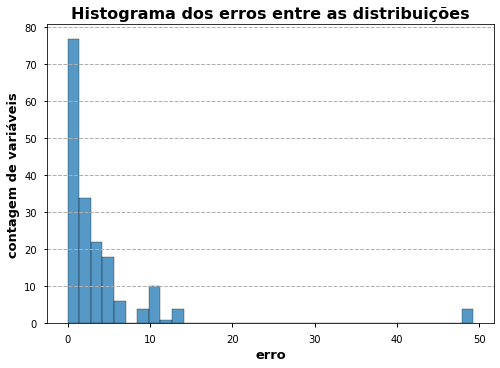

In [51]:
sns.histplot(data = tabela_erros, x = 'Erro')
plt.title('Histograma dos erros entre as distribuições', fontdict={'fontsize':16, 'fontweight': 'bold'})
plt.xlabel('erro', fontdict={'fontsize':13, 'fontweight': 'bold'})
plt.ylabel('contagem de variáveis', fontdict={'fontsize':13, 'fontweight': 'bold'})
plt.grid(axis = 'y', linestyle = '--', linewidth = 1)
plt.show()

Assim como excluímos as variáveis com apenas um valor em todos os pacientes, vamos excluir também as variáveis com pouca variação nos dados:

In [52]:
colunas_com_pouca_variacao = tabela_erros.query('Erro < 2').index.tolist()
colunas_com_pouca_variacao, len(colunas_com_pouca_variacao)

(['ALBUMIN_MEDIAN',
  'ALBUMIN_MEAN',
  'ALBUMIN_MIN',
  'ALBUMIN_MAX',
  'BE_ARTERIAL_MEDIAN',
  'BE_ARTERIAL_MEAN',
  'BE_ARTERIAL_MIN',
  'BE_ARTERIAL_MAX',
  'BE_VENOUS_MEDIAN',
  'BE_VENOUS_MEAN',
  'BE_VENOUS_MIN',
  'BE_VENOUS_MAX',
  'BIC_ARTERIAL_MEDIAN',
  'BIC_ARTERIAL_MEAN',
  'BIC_ARTERIAL_MIN',
  'BIC_ARTERIAL_MAX',
  'BILLIRUBIN_MEDIAN',
  'BILLIRUBIN_MEAN',
  'BILLIRUBIN_MIN',
  'BILLIRUBIN_MAX',
  'BLAST_MEDIAN',
  'BLAST_MEAN',
  'BLAST_MIN',
  'BLAST_MAX',
  'CREATININ_MEDIAN',
  'CREATININ_MEAN',
  'CREATININ_MIN',
  'CREATININ_MAX',
  'FFA_MEDIAN',
  'FFA_MEAN',
  'FFA_MIN',
  'FFA_MAX',
  'GGT_MEDIAN',
  'GGT_MEAN',
  'GGT_MIN',
  'GGT_MAX',
  'INR_MEDIAN',
  'INR_MEAN',
  'INR_MIN',
  'INR_MAX',
  'P02_ARTERIAL_MEDIAN',
  'P02_ARTERIAL_MEAN',
  'P02_ARTERIAL_MIN',
  'P02_ARTERIAL_MAX',
  'PC02_ARTERIAL_MEDIAN',
  'PC02_ARTERIAL_MEAN',
  'PC02_ARTERIAL_MIN',
  'PC02_ARTERIAL_MAX',
  'PC02_VENOUS_MEDIAN',
  'PC02_VENOUS_MEAN',
  'PC02_VENOUS_MIN',
  'PC02_VENOUS_MA

Porém, cabe a aqui a pergunta: será que essas variáveis tem alguma relevância nos dados? Sabemos que elas tem pouca variação, mas será que os dados outliers são todos pacientes que foram para a UTI (ou não foram para a UTI)? Existe uma quantidade grande de outliers?

O código a seguir cria seleciona as variáveis contínuas com a seguinte caracaterística:
- só possuem um mesmo valor para os pacientes que não se internaram na UTI
- possuem mais de um valor para os pacientes que se internaram na UTI

A partir daí coletamos algumas informações sobre essas variáveis, como o (único) valor para pacientes fora da UTI, os valores máximo e mínimo e a quantidade de valores distintos do valor de referência ('outliers'). 


In [53]:
colunas_continuas_baixa_variacao = []
valores_referencia = []
min_outiliers = []
max_outliers = []
qtd_outilier = []
qtd_pac_out = []
for x in colunas_continuas:
  a = len(set(dados_resumidos.query('ICU == 0')[x].tolist()))
  b = len(set(dados_resumidos.query('ICU == 1')[x].tolist()))
  if a == 1 and b > 1:
    colunas_continuas_baixa_variacao.append(x)
    valor = dados_resumidos.query('ICU == 0')[x].tolist()[0]
    valores_referencia.append(valor)
    v_min = min(dados_resumidos.query('ICU == 1')[x].tolist())
    v_max = max(dados_resumidos.query('ICU == 1')[x].tolist())
    m = len(dados_resumidos.query('ICU == 1')[dados_resumidos[x] != valor][x].tolist())
    n = dados_resumidos.query('ICU == 1')[dados_resumidos[x] != valor].shape[0]
    min_outiliers.append(v_min)
    max_outliers.append(v_max)
    qtd_outilier.append(m)
    qtd_pac_out.append(n)

df_pouca_variacao = pd.DataFrame()
df_pouca_variacao['Variável'] = colunas_continuas_baixa_variacao
df_pouca_variacao['Valor_referencia'] = valores_referencia
df_pouca_variacao['Mínimo'] = min_outiliers
df_pouca_variacao['Máximo'] = max_outliers
df_pouca_variacao['Qtd_valores'] = qtd_outilier
df_pouca_variacao['Qtd_pac_out'] = qtd_pac_out
df_pouca_variacao                                                              

,Variável,Valor_referencia,Mínimo,Máximo,Qtd_valores,Qtd_pac_out
0,BE_ARTERIAL_MEDIAN,-1.00,-1.00,-0.61,3,3
1,BE_ARTERIAL_MEAN,-1.00,-1.00,-0.61,3,3
2,BE_ARTERIAL_MIN,-1.00,-1.00,-0.61,3,3
3,BE_ARTERIAL_MAX,-1.00,-1.00,-0.61,3,3
4,BIC_ARTERIAL_MEDIAN,-0.32,-0.76,-0.12,5,5
5,BIC_ARTERIAL_MEAN,-0.32,-0.76,-0.12,5,5
6,BIC_ARTERIAL_MIN,-0.32,-0.76,-0.12,5,5
7,BIC_ARTERIAL_MAX,-0.32,-0.76,-0.12,5,5
8,BLAST_MEDIAN,-1.00,-1.00,1.00,2,2
9,BLAST_MEAN,-1.00,-1.00,1.00,2,2


Como vemos, temos uma quantidade até siginificativa de variáveis nessa condição.
Vejamos a soma das quantidades de pacientes com dados outilers:

In [54]:
df_pouca_variacao['Qtd_pac_out'].sum(), dados_resumidos.query('ICU == 1').shape[0]

(144, 162)

A soma total é 144 (e temos um total de 162 pacientes que foram para a UTI). Mas muitos desses pacientes podem ter sido contados várias vezes. Precisamos saber quantos pacientes realmente apresentam valores outliers para essas variáveis. Se forem realmente 144 (ou algo próximo disso) poderíamos usar essas variáveis para decidir se um paciente vai ou não para a UTI.
Primeiro, criamos um dataframe auxiliar:

In [55]:
df_aux = dados_resumidos[colunas_continuas_baixa_variacao] / valores_referencia
df_aux['ICU'] = dados_resumidos['ICU']
df_aux

,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,ICU
0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1
2,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1
3,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0
4,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0
5,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1
381,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0
382,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1
383,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0


Temos agora um dataframe com vários 1 (que correspondem aos valores iguais a valor de referência) e alguns valores diferentes de 1 (que correspondem a valores diferentes do valor de referência). Para então contar quantos são os distintos, podemos somar nas colunas e comparar com a quantidade de colunas:

In [56]:
(df_aux.query('ICU == 1').drop('ICU', axis = 1).sum(axis = 1) / (df_aux.shape[1] - 1) != 1).sum()

9

Ou seja, apenas 9 pacientes apresentam outiliers nas colunas com baixa variação. Concluímos então que apenas essas variáveis não são boas para decidir se um paciente vai ou não para a UTI

Claro, obviamente não analisamos todas as colunas com pouca variação nos dados (são 89, como vimos acima). Mas da análise acima, acho que é razoável supor que realmente essas variáveis são dispensáveis. Por isso, nós a excluiremos do nosso dataframe:

In [57]:
dados_resumidos_original = dados_resumidos.copy()
colunas_continuas_original = colunas_continuas.copy()
dados_resumidos.drop(colunas_com_pouca_variacao, axis=1, inplace=True)
dados_resumidos.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,...,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,WINDOW,ICU
0,0,1,0.60,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,-0.32,-0.32,-0.32,-0.32,0.18,0.18,0.18,0.18,-0.89,-0.89,-0.89,-0.89,0.09,0.09,0.09,0.09,0.11,0.11,0.11,0.11,1.00,1.00,1.00,1.00,-0.84,-0.84,-0.84,...,-0.52,-0.52,-0.52,0.35,0.35,0.35,0.35,-0.03,-0.03,-0.03,-0.03,-0.84,-0.84,-0.84,-0.84,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.24,0.00,-0.16,-0.50,0.21,-0.25,-0.46,-0.43,-0.64,-0.42,0.74,0-2,1
2,2,0,0.10,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.32,-0.32,-0.32,-0.32,0.36,0.36,0.36,0.36,-0.78,-0.78,-0.78,-0.78,0.14,0.14,0.14,0.14,0.16,0.16,0.16,0.16,1.00,1.00,1.00,1.00,-0.38,-0.38,-0.38,...,-0.70,-0.70,-0.70,0.35,0.35,0.35,0.35,0.09,0.09,0.09,0.09,-0.84,-0.84,-0.84,-0.84,-0.49,-0.69,-0.05,-0.65,0.36,0.94,-0.51,-0.82,-0.06,-0.52,0.36,0.95,-0.53,-0.51,-0.11,-0.71,0.60,-0.44,-0.49,0.00,-0.58,0.10,1.00,0-2,1
3,3,0,0.40,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,-0.32,-0.32,-0.32,-0.32,0.33,0.33,0.33,0.33,-0.89,-0.89,-0.89,-0.89,-0.20,-0.20,-0.20,-0.20,-0.22,-0.22,-0.22,-0.22,-0.83,-0.83,-0.83,-0.83,-0.73,-0.73,-0.73,...,-0.78,-0.78,-0.78,0.58,0.58,0.58,0.58,0.20,0.20,0.20,0.20,-0.94,-0.94,-0.94,-0.94,0.01,-0.37,-0.53,-0.46,-0.29,0.68,0.01,-0.37,-0.53,-0.45,-0.29,0.68,0.18,-0.11,-0.38,-0.36,0.21,-0.30,-0.56,-0.63,-0.52,-0.42,0.68,0-2,0
4,4,0,0.10,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.32,-0.32,-0.32,-0.32,0.36,0.36,0.36,0.36,-0.85,-0.85,-0.85,-0.85,0.36,0.36,0.36,0.36,0.30,0.30,0.30,0.30,1.00,1.00,1.00,1.00,-0.70,-0.70,-0.70,...,-0.59,-0.59,-0.59,0.35,0.35,0.35,0.35,0.14,0.14,0.14,0.14,-0.90,-0.90,-0.90,-0.90,0.33,-0.15,0.16,-0.59,0.29,0.87,0.33,-0.15,0.16,-0.59,0.29,0.87,0.44,0.00,0.20,-0.57,0.54,-0.08,-0.35,-0.04,-0.58,0.07,0.89,0-2,0
5,5,0,0.10,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.32,-0.32,-0.32,-0.32,0.36,0.36,0.36,0.36,-0.89,-0.89,-0.89,-0.89,0.29,0.29,0.29,0.29,0.24,0.24,0.24,0.24,1.00,1.00,1.00,1.00,-0.71,-0.71,-0.71,...,-0.67,-0.67,-0.67,0.35,0.35,0.35,0.35,0.09,0.09,0.09,0.09,-0.88,-0.88,-0.88,-0.88,-0.04,-0.54,-0.54,-0.53,-0.20,0.82,-0.04,-0.54,-0.54,-0.52,-0.20,0.82,0.03,-0.38,-0.40,-0.43,0.25,-0.25,-0.57,-0.63,-0.58,-0.33,0.84,0-2,0


Observe que temos agora apenas 106 colunas no dataframe.
E novamente vamos redefinir as colunas contínuas:

In [58]:
colunas_continuas = [x for x in colunas_continuas if x not in colunas_com_pouca_variacao]

Vejamos a correlação entre as variáveis contínuas restantes, utilizando um heatmap:

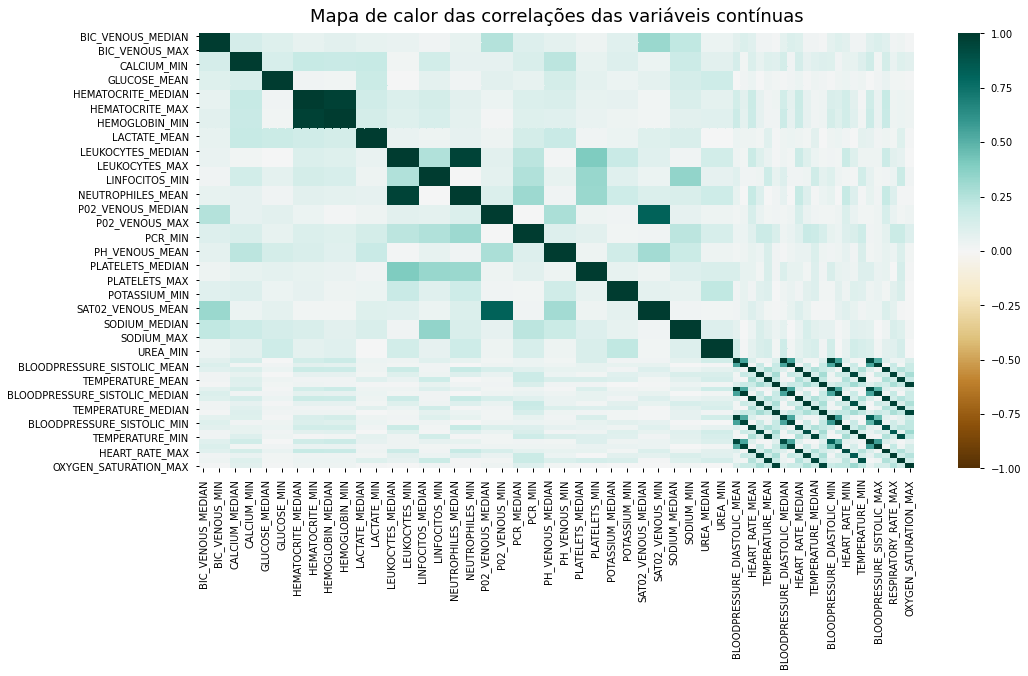

In [59]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(abs(dados_resumidos[colunas_continuas].corr()), vmin=-1, vmax=1, cmap='BrBG')
heatmap.set_title('Mapa de calor das correlações das variáveis contínuas', fontdict={'fontsize':18}, pad=12);

O código a seguir retorna as maiores correlações entre as variáveis:

In [60]:
tab_corr = 100*abs(dados_resumidos[colunas_continuas].corr())
tab_corr[tab_corr < 100].max().sort_values(ascending = False)[0:30]

BLOODPRESSURE_SISTOLIC_MEAN      99.69
BLOODPRESSURE_SISTOLIC_MEDIAN    99.69
HEART_RATE_MEDIAN                99.32
HEART_RATE_MEAN                  99.32
TEMPERATURE_MEAN                 99.32
TEMPERATURE_MEDIAN               99.32
BLOODPRESSURE_DIASTOLIC_MEDIAN   99.23
BLOODPRESSURE_DIASTOLIC_MEAN     99.23
OXYGEN_SATURATION_MEDIAN         99.07
OXYGEN_SATURATION_MEAN           99.07
RESPIRATORY_RATE_MEDIAN          98.91
RESPIRATORY_RATE_MEAN            98.91
HEART_RATE_MAX                   98.11
HEMATOCRITE_MEDIAN               97.59
HEMATOCRITE_MEAN                 97.59
HEMATOCRITE_MIN                  97.59
HEMATOCRITE_MAX                  97.59
HEMOGLOBIN_MEDIAN                97.59
HEMOGLOBIN_MAX                   97.59
HEMOGLOBIN_MEAN                  97.59
HEMOGLOBIN_MIN                   97.59
BLOODPRESSURE_SISTOLIC_MAX       97.40
TEMPERATURE_MIN                  97.30
HEART_RATE_MIN                   96.98
RESPIRATORY_RATE_MAX             96.77
TEMPERATURE_MAX          

In [61]:
maiores_correlacoes = tab_corr[tab_corr < 100].max().sort_values(ascending = False)
maiores_correlacoes

BLOODPRESSURE_SISTOLIC_MEAN     99.69
BLOODPRESSURE_SISTOLIC_MEDIAN   99.69
HEART_RATE_MEDIAN               99.32
HEART_RATE_MEAN                 99.32
TEMPERATURE_MEAN                99.32
                                 ... 
LACTATE_MIN                     20.27
GLUCOSE_MEDIAN                  18.67
GLUCOSE_MIN                     18.67
GLUCOSE_MAX                     18.67
GLUCOSE_MEAN                    18.67
Length: 91, dtype: float64

Vejamos um histograma dessas correlações:

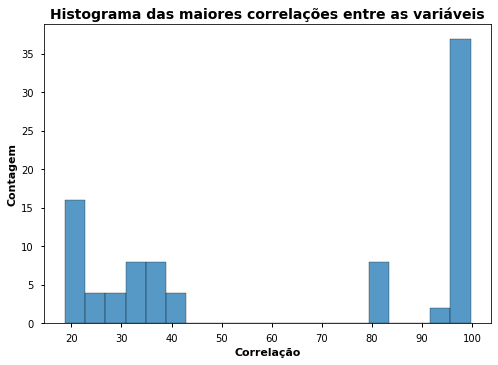

In [62]:
sns.histplot(maiores_correlacoes, bins = 20)
plt.title('Histograma das maiores correlações entre as variáveis', fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.xlabel('Correlação', fontdict = {'fontsize':11, 'fontweight':'bold'})
plt.ylabel('Contagem', fontdict = {'fontsize':11, 'fontweight':'bold'})
plt.show()

Por fim, vamos salvar nosso dataframe dados_resumidos em um arquivo csv. Esse arquivo foi salvo em um repositório do Github para poder ser acessado remotamente no próximo notebook.

In [63]:
dados_resumidos.to_csv('dados_resumidos_UTI')